<a href="https://colab.research.google.com/github/HyacinthFrance/music-analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import librosa
from librosa import display
from scipy import signal
from IPython.display import Audio

In [ ]:
#pip install git+https://github.com/librosa/librosa

In [ ]:
#pip install git+https://github.com/csteinmetz1/pyloudnorm

In [ ]:
#import audio samples
#data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/1.happy.wav', sr=44100) #fasttempo #highdynamic #happy
#data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/2.wav', sr=44100) #mediumtempo #mediumdynamic #calm
#data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/3.wav', sr=44100) #mediumtempo #mediumdynamic #happy
#data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/4.wav', sr=44100) #slowtempo #lowdynamic #sad
#data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/5.wav', sr=44100) #mediumtempo #highdynamic #angry
#data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/mm1.wav', sr=44100) #happy
#data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/mm2.wav', sr=44100) #angry
#data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/mm3.wav', sr=44100) #calm
data, sr = librosa.load('/content/drive/MyDrive/Project/audio_sample/mm4.wav', sr=44100) #sad
Audio(data, rate=sr)

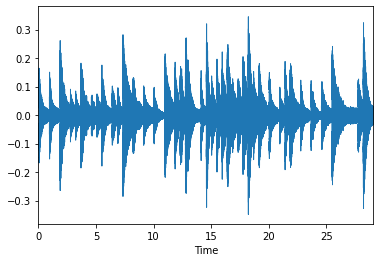

In [ ]:
librosa.display.waveplot(data, sr=sr)

In [ ]:
from librosa import onset
onset_env = librosa.onset.onset_strength(data, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo

array([132.51201923])

In [ ]:
#emotion define
#happy = 0
#angry = 1
#sad = 2
#relax = 3
emotion=[0.0,0.0,0.0,0.0]
if tempo > 126:
  emotion[0] = emotion[0]+1/2
  emotion[1] = emotion[1]+1/2
elif tempo > 76:
  emotion[1] = emotion[1]+1/2
  emotion[3] = emotion[3]+1/2
else:
  emotion[2] = emotion[2]+1/2
  emotion[3] = emotion[3]+1/2

emotion

[0.5, 0.5, 0.0, 0.0]

Text(0.5, 0, 'time(s)')

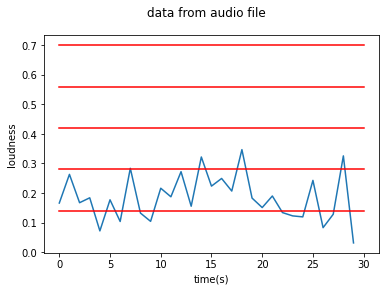

In [ ]:
db_data = [abs(i) for i in data]
dynamic = []

i = 0
window_length = sr
total_max = db_data[i]
while i < len(db_data):
  j = 0
  max = db_data[i]
  while j < window_length:
    if i+j > len(db_data)-1:
      break
    if db_data[i+j] > max:
      max = db_data[i+j]
    if db_data[i+j] > total_max:
      total_max = db_data[i+j]
    j = j+1
  dynamic.append(max)
  i = i+window_length

x = np.linspace(0,len(dynamic),50)
fig, ax = plt.subplots(1)
fig.suptitle('data from audio file')
#ax[0].plot(db_data)
ax.plot(dynamic)

total_max=0.7

#dynamic scalar scale
ax.errorbar(x,total_max*1/5,color='red') #pp
ax.errorbar(x,total_max*2/5,color='red') #p
ax.errorbar(x,total_max*3/5,color='red') #mp/mf
ax.errorbar(x,total_max*4/5,color='red') #f
ax.errorbar(x,total_max,color='red')     #ff

plt.ylabel("loudness")
plt.xlabel("time(s)")


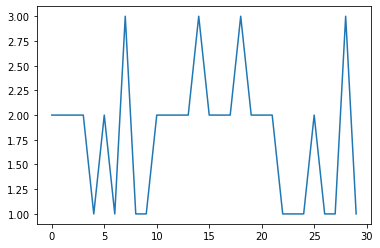

In [ ]:
#scalar dynamic in 5 scale through audio
#and track emotion through audio
dynamic_scale = []
emotion_value = []
i = 0
while i < len(dynamic):
  if dynamic[i] < total_max*1/5:
    dynamic_scale.append(1)
    a = np.divide(np.add(emotion,[2/5,2/5,0,0]),[2,2,1,1])
    emotion_value.append(a.tolist())
  elif dynamic[i] < total_max*2/5:
    dynamic_scale.append(2)
    a = np.divide(np.add(emotion,[1/5,1/5,0,0]),[2,2,1,1])
    emotion_value.append(a.tolist())
  elif dynamic[i] < total_max*3/5:
    dynamic_scale.append(3)
    emotion_value.append(emotion)
  elif dynamic[i] < total_max*4/5:
    dynamic_scale.append(4)
    a = np.divide(np.add(emotion,[0,0,1/5,1/5]),[1,1,2,2])
    emotion_value.append(a.tolist())
  elif dynamic[i] < total_max:
    dynamic_scale.append(5)
    a = np.divide(np.add(emotion,[0,0,2/5,2/5]),[1,1,2,2])
    emotion_value.append(a.tolist())
  i = i+1

plt.plot(dynamic_scale)

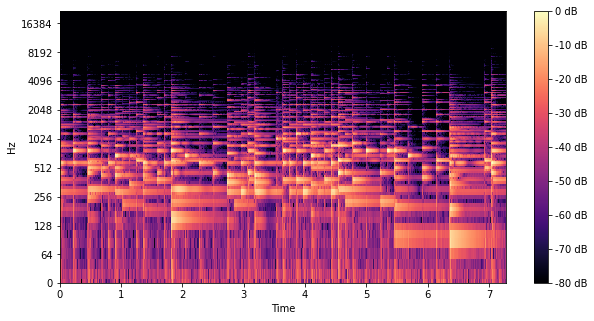

In [ ]:
from librosa import feature
fig, ax =plt.subplots(1, 1, figsize=(10,5))
s_db = librosa.amplitude_to_db(np.abs(librosa.stft(data,hop_length=2048)), ref=np.max)
img1 = librosa.display.specshow(s_db, x_axis='time',y_axis='log', sr=sr)
fig.colorbar(img1, ax=ax, format="%d dB")

In [ ]:
emotion_value

[[0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.5, 0.5, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.5, 0.5, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.5, 0.5, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.35, 0.35, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0],
 [0.5, 0.5, 0.0, 0.0],
 [0.45, 0.45, 0.0, 0.0]]

In [ ]:
#track emotion with dynamic scale and tempo
emotion_track1 = []
emotion_track2 = []
i = 0
while i < len(emotion_value):
  j = 0
  n = 0
  while j < len(emotion_value[i]):
    if emotion_value[i][j]>emotion_value[i][n]:
      n = j
    j = j+1
  if n == 0:
    emotion_track1.append("happy")
  elif n == 1:
    emotion_track1.append("angry")
  elif n == 2:
    emotion_track1.append("sad")
  elif n == 3:
    emotion_track1.append("relax")
  i = i+1
  


In [ ]:
emotion_track1

['happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy']

In [ ]:
#color track
color_track = []
i = 0
while i < len(emotion_track1):
  if emotion_track1[i]=="happy":
    color_track.append("yellow")
  elif emotion_track1[i]=="angry":
    color_track.append("red")
  elif emotion_track1[i]=="sad":
    color_track.append("brown")
  elif emotion_track1[i]=="relax":
    color_track.append("blue")
  i = i+1

Text(0, 0.5, 'light intensity level')

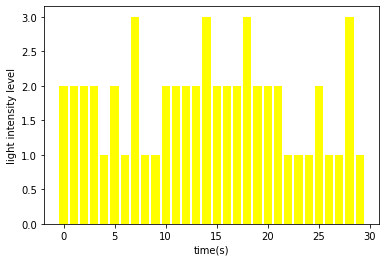

In [ ]:
#color plot
plt.bar(np.arange(len(dynamic_scale)),dynamic_scale,color=color_track)
plt.xlabel("time(s)")
plt.ylabel("light intensity level")

#yellow = happy
#red = angry
#brown=sad
#blue = relax